# Machine Learning for Autism Spectrum Disorder Detection: Insights from Behavioral Screening Data

### **Project Overview**

This project leverages machine learning techniques to analyze behavioral screening data and demographic attributes for detecting Autism Spectrum Disorder (ASD) in adults. By carefully exploring and refining the dataset, we aim to develop an interpretable and reliable model that identifies key factors associated with ASD likelihood and provides actionable insights for early screening methodologies.

---

### **Refined Project Objectives**

Insights from the exploratory data analysis (EDA) phase prompted a reassessment of the project's focus. Specifically, the `result` feature, a composite metric derived from individual screening questions (`A1_Score` to `A10_Score`), was found to be redundant. This led to a shift in priorities to emphasize granular, interpretable features. The objectives are:

1. **Identify Key Predictors**: Prioritize the detailed behavioral screening responses (`A1_Score` to `A10_Score`) over composite metrics to enhance interpretability and reduce redundancy.
2. **Develop Accurate and Interpretable Models**: Focus on streamlined feature sets to balance accuracy with model simplicity and transparency.
3. **Validate Robustness**: Ensure models generalize effectively to unseen data through cross-validation and diverse evaluation metrics.
4. **Enhance Early Detection Strategies**: Provide a data-driven framework that aligns with actionable insights for healthcare professionals, aiding in early ASD screening.

---

### **About the Data**

This dataset focuses on adult individuals undergoing a preliminary ASD screening process. It combines standardized behavioral assessments (e.g., AQ-10-Adult questions) with relevant demographic and historical information. By integrating self-reported behaviors with contextual data, this dataset offers a unique opportunity to explore patterns associated with ASD traits and refine predictive strategies.

The dataset includes behavioral screening responses and demographic features such as age, gender, ethnicity, family ASD history, and prior exposure to screening tools. The target variable represents a binary classification problem, indicating whether an individual screened shows a high likelihood of ASD.

### **Features and Descriptions**

| Variable Name     | Role    | Variable Type | Description                                                        |
| :-                | :-      | :-            | :-                                                                 |
| A1_Score          | Feature | Integer       | The answer to the first screening question.                       |
| A2_Score          | Feature | Integer       | The answer to the second screening question.                      |
| A3_Score          | Feature | Integer       | The answer to the third screening question.                       |
| A4_Score          | Feature | Integer       | The answer to the fourth screening question.                      |
| A5_Score          | Feature | Integer       | The answer to the fifth screening question.                       |
| A6_Score          | Feature | Integer       | The answer to the sixth screening question.                       |
| A7_Score          | Feature | Integer       | The answer to the seventh screening question.                     |
| A8_Score          | Feature | Integer       | The answer to the eighth screening question.                      |
| A9_Score          | Feature | Integer       | The answer to the ninth screening question.                       |
| A10_Score         | Feature | Integer       | The answer to the tenth screening question.                       |
| age               | Feature | Integer       | Age in years.                                                     |
| gender            | Feature | Categorical   | Male or Female.                                                   |
| ethnicity         | Feature | Categorical   | Ethnicity of the individual.                                      |
| jaundice          | Feature | Categorical   | Whether the individual was born with jaundice (yes/no).           |
| austim            | Feature | Categorical   | Whether an immediate family member has been diagnosed with autism.           |
| country_of_res    | Feature | Categorical   | Nationality of the individual.                                    |
| used_app_before   | Feature | Categorical   | Whether the user has used a screening app previously (yes/no).    |
| result            | Feature | Integer       | Score obtained from the screening test.                           |
| age_desc          | Feature | Categorical   | Range of age of the individual.                                   |
| relation          | Feature | Categorical   | Relation of the person completing the test to the subject.        |
| Class/ASD         | Target  | Categorical   | The final classification based on the scoring algorithm (YES/NO). |


### Library Imports

In this project, we will utilize a variety of libraries for tasks such as data preprocessing, exploratory data analysis (EDA), machine learning model building, and evaluation. The libraries are essential for ensuring an efficient and streamlined workflow.


In [1]:
# Importing Libraries

# For data manipulation and analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis
from scipy.stats import ttest_ind, chi2_contingency

# For machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    auc
)
from sklearn.inspection import permutation_importance

# For advanced models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# For oversampling (addressing class imbalance)
from imblearn.over_sampling import SMOTE

# For model interpretation
import shap

# For saving and loading models
import joblib

# For displaying results
from IPython.display import display

# Suppress warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# Display setup
print("Libraries imported successfully!")


Libraries imported successfully!


### Dataset Overview

Before diving into analysis and modeling, we explore the dataset to:
- Understand its structure and size.
- Preview the data and assess data types.
- Identify potential issues such as missing values, placeholder values, or inconsistencies.

This exploration will guide subsequent cleaning and preprocessing steps.

In [3]:
# Load the dataset
data = pd.read_csv('Autism Screening.csv')

# Dataset Overview

# Display the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.\n")

# Display the first few rows
print("Preview of the dataset:")
display(data.head())

# Display information about the dataset
print("\nDataset Information:")
data.info()

# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Features:")
display(data.describe())

Dataset contains 704 rows and 21 columns.

Preview of the dataset:


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result       

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


### Identifying Data Quality Issues

Following the dataset overview, we examine specific issues that require cleaning:
1. Placeholder values (`?`): Commonly used as placeholders for missing data in some columns.
2. Missing values: Potential gaps in data completeness.
3. Duplicates: Rows that may be repeated and could introduce bias.

We identify these issues using the following checks:
- Count occurrences of `?` in categorical columns.
- Identify columns with missing values (`NaN`) after replacing `?`.
- Count duplicate rows in the dataset.


In [5]:
# Check for Placeholder Values and Missing Data
print("\nPossible Placeholder Values ('?') per Column:")
placeholder_values = (data == '?').sum()
print(placeholder_values[placeholder_values > 0])

# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Check for Missing Values After Replacing '?'
print("\nMissing Values per Column After Replacement:")
print(data.isnull().sum())

# Check for Duplicates
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")



Possible Placeholder Values ('?') per Column:
age           2
ethnicity    95
relation     95
dtype: int64

Missing Values per Column After Replacement:
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

Number of duplicate rows: 5


### Data Cleaning Decisions

Based on the identified issues:
1. **Placeholder Values (`?`)**: Replaced with `NaN` for standard handling of missing data.
2. **Missing Values**:
   - **`age` (2 missing values)**: Converted to numeric and imputed with the median to maintain numerical continuity.
   - **`ethnicity` and `relation` (95 missing values each)**: Imputed with the mode (most frequent value) to minimize bias in categorical data.
3. **Duplicates**: Removed to ensure all entries are unique.

These cleaning decisions ensure data integrity while preparing the dataset for analysis and modeling.


In [7]:
# Remove Duplicate Rows
data.drop_duplicates(inplace=True)
print(f"\nNumber of duplicates after removal: {data.duplicated().sum()}")

# Convert 'age' to numeric and handle missing values
print("Unique values in 'age' before conversion:")
print(data['age'].unique())
data['age'] = pd.to_numeric(data['age'], errors='coerce')

if data['age'].isnull().sum() > 0:
    print(f"\nMissing values in 'age' after conversion: {data['age'].isnull().sum()}")
    data['age'] = data['age'].fillna(data['age'].median())

# Impute Missing Values for Categorical Columns
data['ethnicity'] = data['ethnicity'].fillna(data['ethnicity'].mode()[0])
data['relation'] = data['relation'].fillna(data['relation'].mode()[0])

# Confirm no missing values remain
print("\nMissing Values After Imputation:")
print(data.isnull().sum())



Number of duplicates after removal: 0
Unique values in 'age' before conversion:
['26' '24' '27' '35' '40' '36' '17' '64' '29' '33' '18' '31' '30' '34'
 '38' '42' '43' '48' '37' '55' '50' '53' '20' '28' '21' '383' '47' '32'
 '44' <NA> '19' '58' '45' '22' '39' '25' '23' '54' '60' '41' '46' '56'
 '61' '59' '52' '49' '51']

Missing values in 'age' after conversion: 2

Missing Values After Imputation:
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


### Data Cleaning Summary

The dataset has been cleaned as follows:
1. **Placeholder values (`?`)**: Replaced with `NaN`.
2. **Missing values**:
   - **`age`**: Converted to numeric and imputed with the median.
   - **`ethnicity`** and **`relation`**: Imputed with the mode.
3. **Duplicates**: Removed 5 duplicate rows, leaving 699 rows.

The dataset is now clean and ready for exploratory data analysis (EDA).


### Exploratory Data Analysis (EDA)

In this section, we explore the cleaned dataset to gain insights into its structure and relationships. The objectives of the EDA are as follows:
1. **Target Variable Analysis**: Examine the distribution of the `Class/ASD` target variable to assess class balance.
2. **Feature Distributions**:
   - For binary features (`A1_Score` to `A10_Score`), visualize value counts to understand their distributions.
   - For numerical features (e.g., `age`, `result`), analyze distributions and check for outliers.
3. **Correlation Analysis**: Explore relationships between numerical features, including `result`, to identify potential dependencies.
4. **Feature-Target Relationships**: Investigate how individual features correlate with the target variable, `Class/ASD`.

This analysis provides foundational insights for feature engineering and model development.

---

### Target Variable Analysis

We begin by examining the target variable, `Class/ASD`, to understand its distribution. This helps identify class imbalance, which is crucial for developing effective machine learning models.



Target Variable Distribution:
Class/ASD
NO     512
YES    187
Name: count, dtype: int64


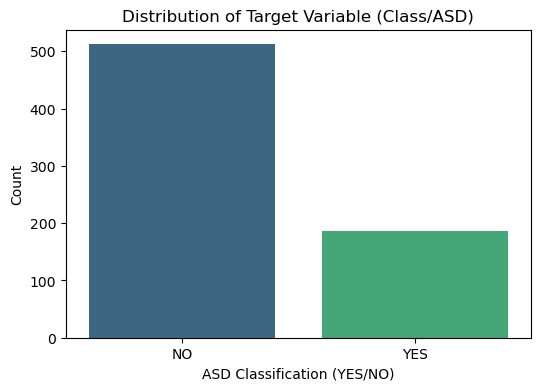

In [9]:
# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:")
print(data['Class/ASD'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Class/ASD', data=data, palette='viridis')
plt.title('Distribution of Target Variable (Class/ASD)')
plt.xlabel('ASD Classification (YES/NO)')
plt.ylabel('Count')
plt.show()


### Target Variable Analysis: Observations

The distribution of the target variable, `Class/ASD`, reveals a significant **class imbalance**:
- The majority class (`NO`) comprises approximately **500 instances**.
- The minority class (`YES`) contains fewer than **200 instances**.

This imbalance has important implications for machine learning:

1. **Bias in Machine Learning Models**:  
   - Models trained on imbalanced datasets may disproportionately favor the majority class (`NO`), resulting in poor performance on the minority class (`YES`).

2. **Impact on Model Evaluation**:  
   - Metrics like **accuracy** can be misleading in imbalanced scenarios, as high accuracy may be achieved by predicting only the majority class.
   - Alternative metrics such as **F1-score**, **ROC-AUC**, and **confusion matrices** should be prioritized for evaluating model performance.

---

### Next Steps:
1. **Address Class Imbalance**:  
   - Apply oversampling techniques like **SMOTE (Synthetic Minority Oversampling Technique)** or undersampling to balance the dataset.

2. **Evaluate Using Robust Metrics**:  
   - Emphasize metrics that account for class imbalance, such as **F1-score**, **Precision-Recall**, and **ROC-AUC**.

3. **Feature Relationships**:  
   - Explore relationships between features and `Class/ASD` to identify the most predictive features.

With these considerations in mind, we will now analyze the distributions of individual features to gain further insights.


### Feature Distribution Analysis: Note on Excluded Features

During the categorical feature distribution analysis, two features, `contry_of_res` and `age_desc`, were not included for the following reasons:

1. **`contry_of_res`**:
   - This feature captures the country of residence, which has high cardinality (many unique values).
   - Such features are often challenging to encode effectively and may not provide significant predictive power for the target variable.

2. **`age_desc`**:
   - This feature is a categorical representation of the numerical `age` feature.
   - Since `age` is already included in the analysis as a numerical feature, `age_desc` is redundant.

These features have been excluded from further analysis to streamline the dataset and focus on the most relevant predictors.


### Feature Distribution Analysis

To better understand the dataset, we analyze the distribution of features to uncover patterns and identify any potential issues:

1. **Categorical Features**:  
   - Use bar plots to visualize the count of each category and detect any imbalances or underrepresented groups.

2. **Numerical Features**:  
   - Examine distributions using histograms to identify trends and detect any potential outliers.


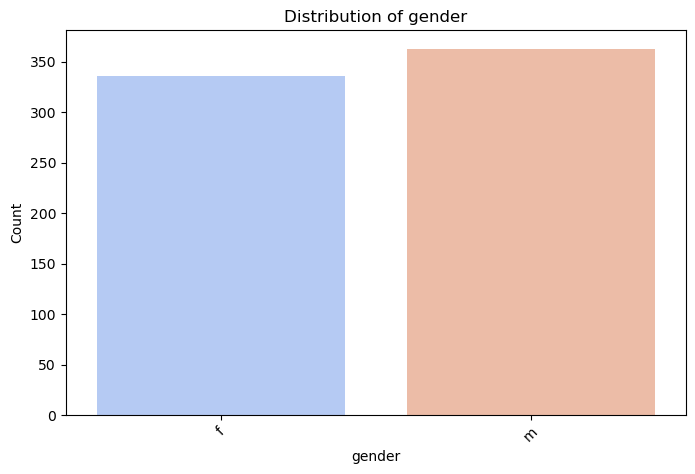

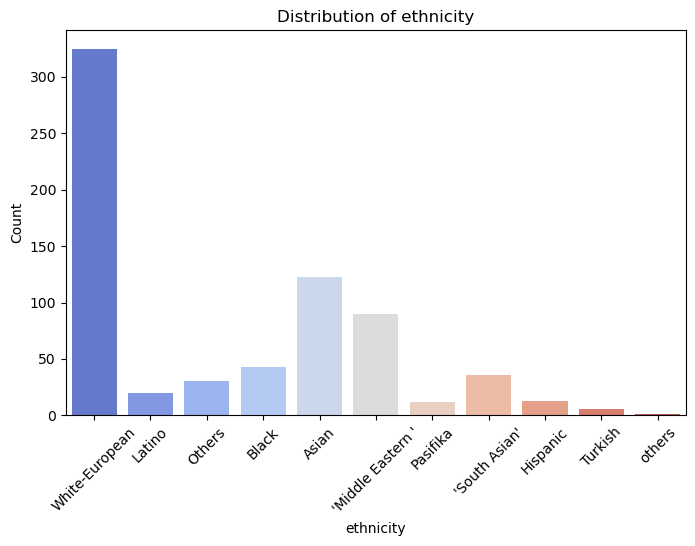

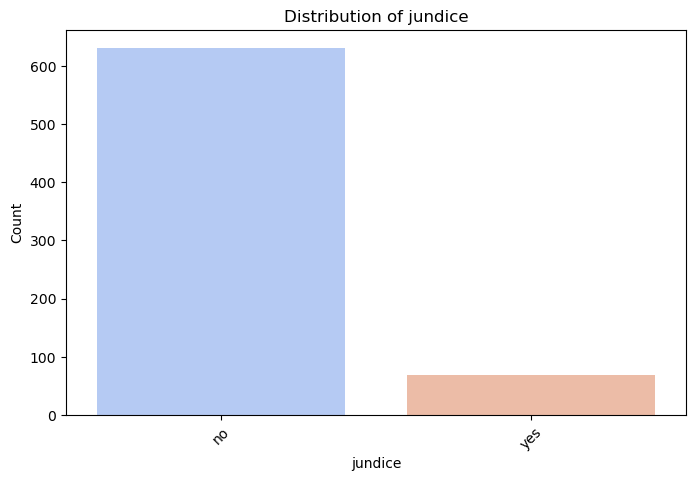

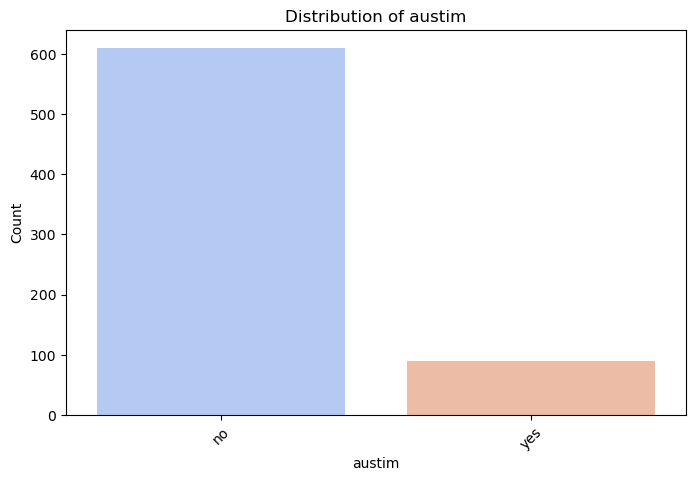

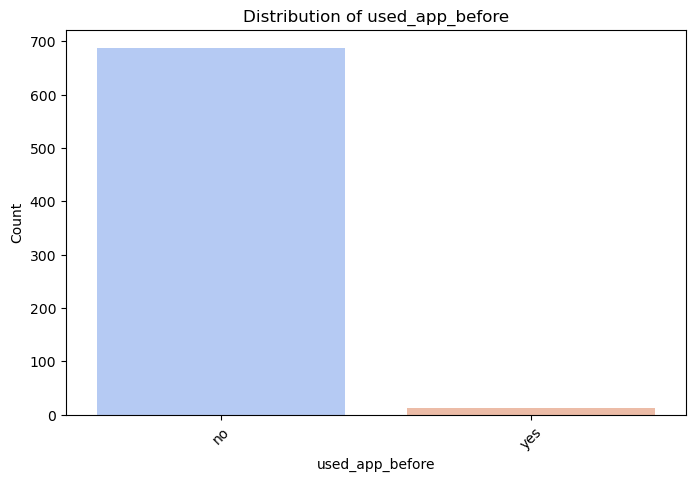

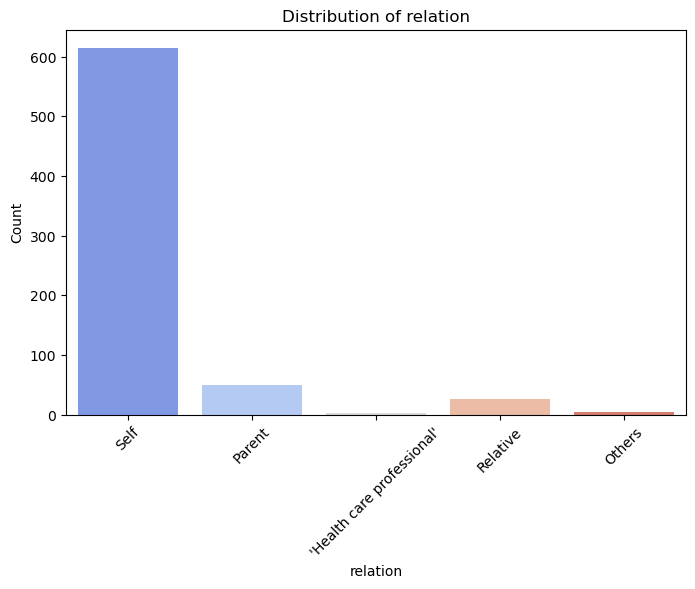

In [11]:
# Categorical Feature Distribution
categorical_features = ['gender', 'ethnicity', 'jundice', 'austim', 'used_app_before', 'relation']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=data, palette='coolwarm')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


### Feature Distribution Analysis: Observations

The categorical feature distributions reveal the following insights:

1. **Gender**:
   - The dataset shows a balanced distribution between `f` (female) and `m` (male), suggesting no significant gender skew.

2. **Ethnicity**:
   - Most participants identify as `White-European`, followed by `Asian` and `Middle Eastern`.
   - Some ethnic groups are sparsely represented, which may affect their predictive power or generalizability.

3. **Jaundice (`jundice`)**:
   - The majority of participants reported **no history of jaundice**, with only a small proportion indicating `yes`.

4. **Autism in Family (`austim`)**:
   - A strong imbalance exists, with the majority of participants reporting **no family history** of autism.

5. **Used App Before**:
   - An extreme skew is evident, with very few participants reporting prior use of autism screening apps.

6. **Relation**:
   - Most tests were self-reported (`Self`), with significantly fewer completed by parents, relatives, or healthcare professionals.

### Key Insights:
- Several categorical features (e.g., `jundice`, `austim`, `used_app_before`) exhibit noticeable class imbalances.
- Features with multiple categories (e.g., `ethnicity`, `relation`) may require encoding strategies that retain predictive value while addressing sparsely populated groups.

### Next Steps:
1. **Numerical Feature Analysis**:
   - Investigate the distributions of numerical features (`age` and `result`) to uncover trends and detect outliers.
2. **Correlation Analysis**:
   - Explore relationships between numerical features to identify multicollinearity or dependencies.

Following these analyses, we will examine **feature-target relationships** to highlight the most relevant predictors of `Class/ASD`.


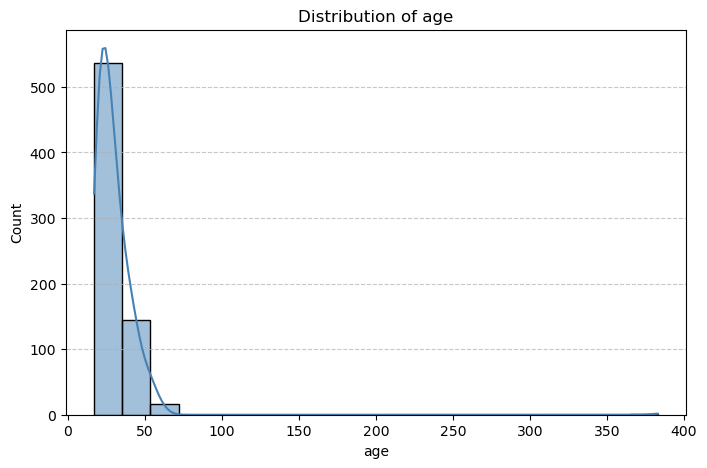

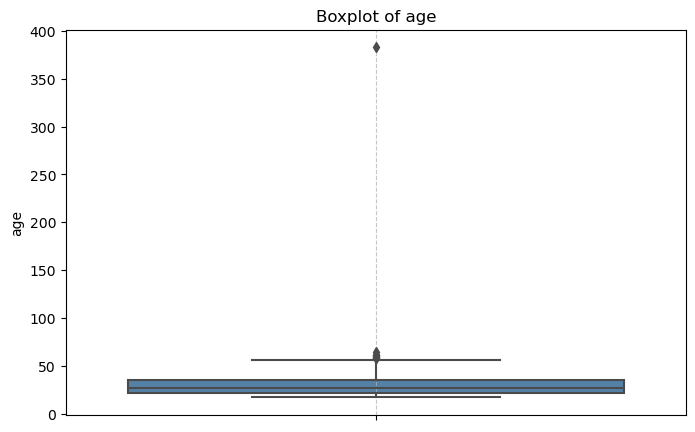

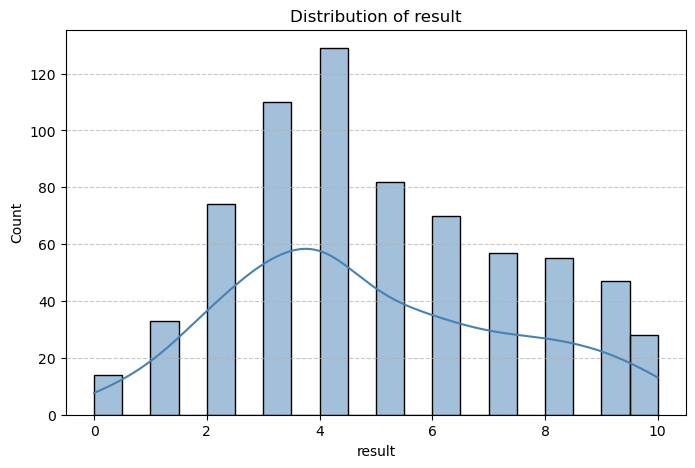

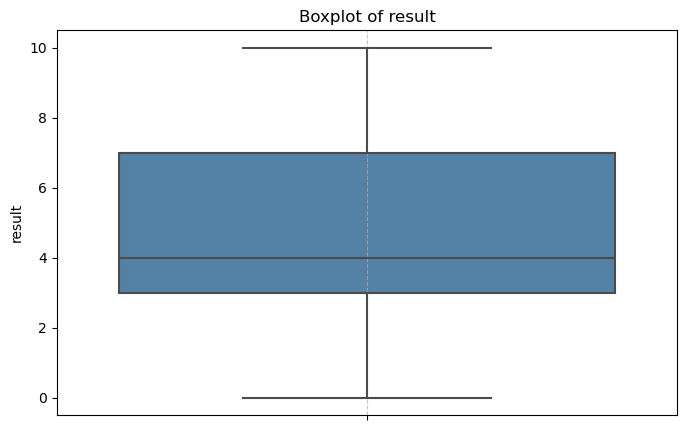

In [13]:
# Numerical Feature Distribution Analysis
numerical_features = ['age', 'result']

for feature in numerical_features:
    # Histogram with KDE
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=20, color='steelblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Boxplot for Outlier Detection
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=data[feature], color='steelblue')
    plt.title(f'Boxplot of {feature}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


### Numerical Feature Analysis: Observations

#### **Age**
- The `age` feature is **right-skewed**, with most individuals falling between **20 and 40 years old**.
- A clear **outlier** exists with an unrealistic value near **400**, significantly distorting the distribution.
- Addressing this outlier is critical to ensure accurate analysis and cleaner visualizations.

---

### Next Steps:
1. **Outlier Removal**:
   - Remove the unrealistic age value to prevent distortion in the dataset.
   - Verify that this adjustment does not inadvertently exclude valid data points.

2. **Reanalyze the `age` Feature**:
   - Re-run the visualizations for `age` to confirm a cleaner distribution after outlier removal.

3. **Proceed to Correlation Analysis**:
   - Examine relationships between numerical features to detect dependencies or multicollinearity.


The maximum age value is: 383.0
New maximum age value after outlier removal: 64.0


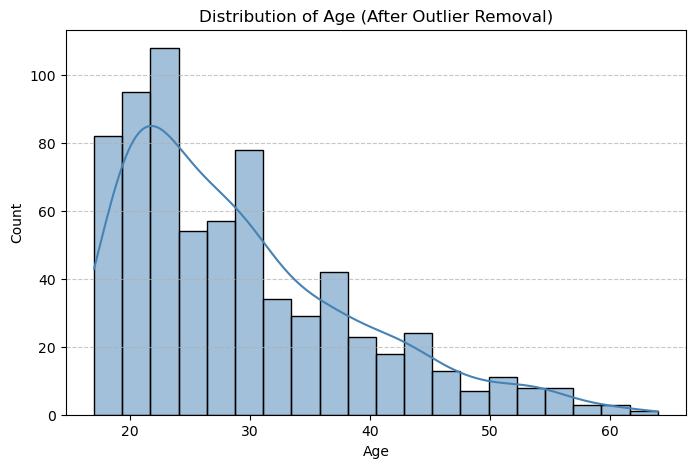

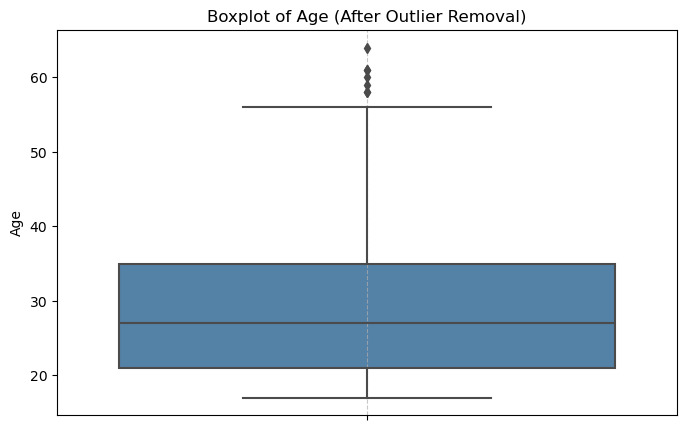

In [15]:
# Step 1: Identify the outlier
outlier_age = data['age'].max()
print(f"The maximum age value is: {outlier_age}")

# Step 2: Remove the outlier (assuming an age cap of 100 years)
data = data[data['age'] < 100]
print(f"New maximum age value after outlier removal: {data['age'].max()}")

# Step 3: Reanalyze the 'age' feature after outlier removal

# Histogram for 'age' (After Outlier Removal)
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=20, kde=True, color="steelblue")
plt.title("Distribution of Age (After Outlier Removal)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for 'age' (After Outlier Removal)
plt.figure(figsize=(8, 5))
sns.boxplot(y=data['age'], color="steelblue")
plt.title("Boxplot of Age (After Outlier Removal)")
plt.ylabel("Age")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Numerical Feature Analysis: Updated Observations

#### **Age** (After Outlier Removal)
- **Distribution**:
   - The `age` feature now presents a more reasonable and interpretable distribution after removing the unrealistic outlier.
   - Most values fall between **18 and 40 years old**, with a gradual decline beyond this range.
   - The feature remains **right-skewed**, which aligns with expectations for adult autism screening data.
- **Boxplot**:
   - A few **mild outliers** above 55 years persist, but they appear reasonable and do not distort the analysis.

#### **Result**
- **Distribution**:
   - The `result` feature continues to show a **bimodal distribution**, with peaks around **4** and **7**.
   - No significant outliers are present, and the feature remains clean for further analysis.
- **Key Observation**:
   - Given its strong correlation with the target variable (`Class/ASD`), the `result` feature remains a critical component for predictive modeling.

---

### Key Adjustments
1. The unrealistic outlier in `age` (close to **400**) was identified and removed using an upper cap of **100 years**, resulting in a cleaner distribution.
2. Both `age` and `result` are retained for further analysis, as they provide complementary information for predictive modeling.

---

### Next Steps
1. **Correlation Analysis**:
   - Generate a heatmap to explore correlations among numerical features (`age`, `result`), identifying any dependencies or redundancies.
2. **Feature-Target Relationships**:
   - Investigate how numerical and categorical features correlate with the target variable (`Class/ASD`) using visualizations such as boxplots and bar plots.
   - Use chi-squared tests to assess the statistical significance of associations between categorical features and the target.

---

### Feature Relationships and Correlations

To ensure the dataset is optimized for modeling:
1. **Numerical Features**: 
   - Generate a heatmap to visualize correlations and identify potential multicollinearity among numerical features.
2. **Categorical Features**:
   - Use Cramér's V statistic to evaluate associations, ensuring no redundancy among categorical features.


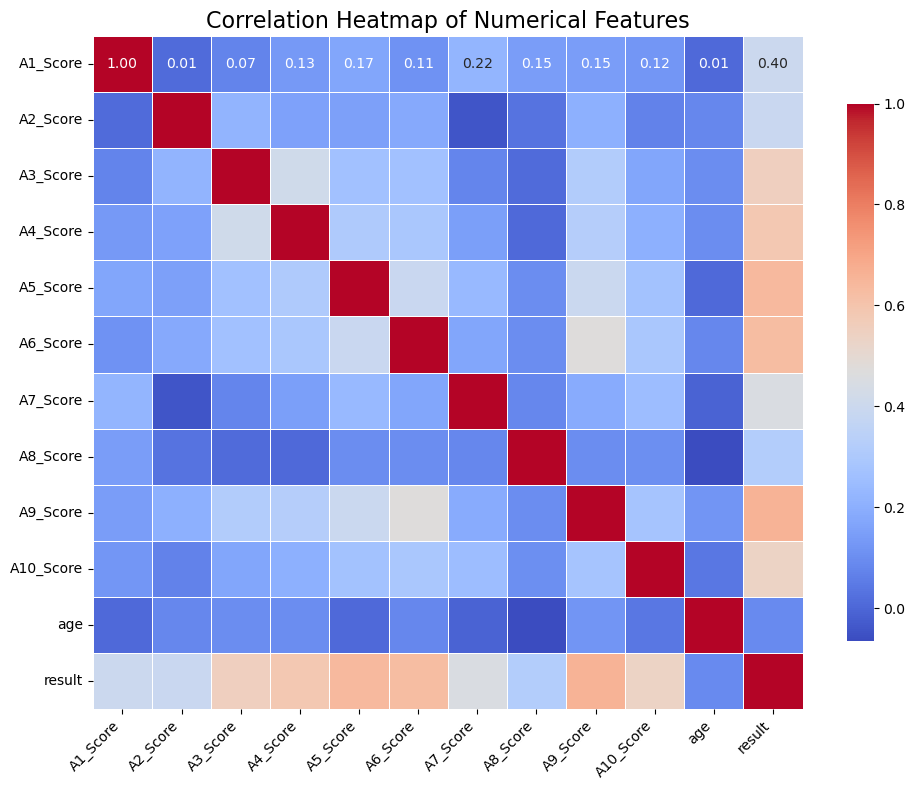

In [17]:
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 8))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Generate the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Add titles and labels
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Feature Relationships and Correlations

#### Numerical Feature Correlations
The correlation heatmap above visualizes the relationships among the numerical features in the dataset:

1. **Observations**:
   - Most numerical features show **weak or no significant correlation** with each other.
   - The **`result`** feature exhibits **strong correlations** with the individual scores (`A1_Score` to `A10_Score`), which is expected since the `result` is derived from these scores.

2. **Key Insights**:
   - The `age` feature has little to no correlation with other numerical features, suggesting it may provide independent information for predictive modeling.
   - While `result` is correlated with the individual scores, it remains a key feature for modeling at this stage due to its strong predictive relationship with `Class/ASD`.

---

### Next Steps:
1. **Feature-Target Relationships**:
   - Analyze how individual features (both numerical and categorical) relate to the target variable, `Class/ASD`.
   - This includes exploring the contributions of `result` and its individual components to the prediction task.

2. **Feature Engineering**:
   - Depending on the results of the analysis, consider transformations, encoding adjustments, or selective feature exclusion to improve model performance and interpretability.


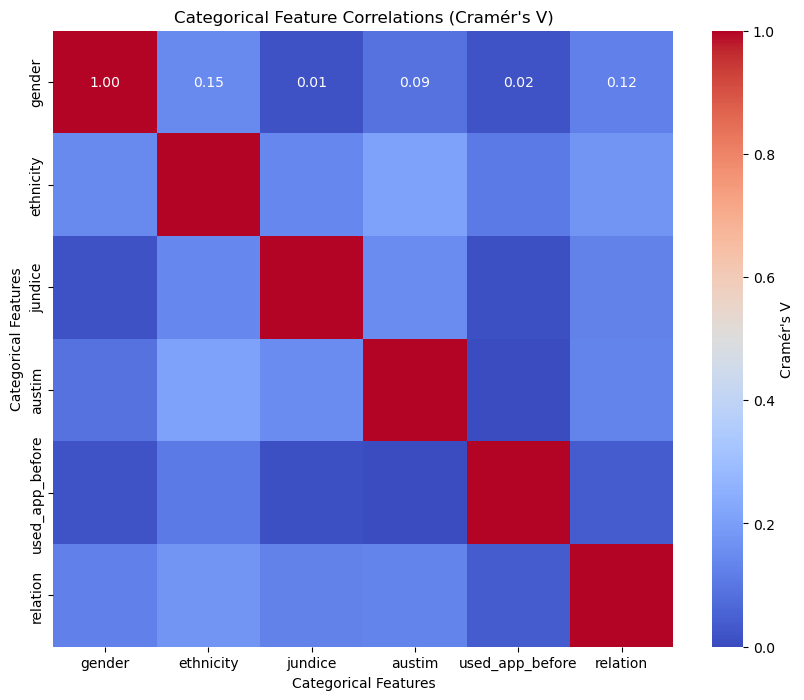

In [19]:
# Categorical Correlation Matrix using Cramér's V
def cramers_v(contingency_matrix):
    """Calculate Cramér's V statistic for a given contingency matrix."""
    chi2 = chi2_contingency(contingency_matrix)[0]
    n = contingency_matrix.sum().sum()  # Correctly sum the entire matrix
    phi2 = chi2 / n
    r, k = contingency_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Initialize an empty DataFrame for Cramér's V correlations
categorical_corr = pd.DataFrame(
    np.zeros((len(categorical_features), len(categorical_features))),
    index=categorical_features,
    columns=categorical_features,
)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            categorical_corr.loc[col1, col2] = 1.0  # Perfect correlation with itself
        else:
            # Compute the contingency table and calculate Cramér's V
            contingency_table = pd.crosstab(data[col1], data[col2])
            try:
                cramers_value = cramers_v(contingency_table)
                categorical_corr.loc[col1, col2] = cramers_value
            except Exception as e:
                categorical_corr.loc[col1, col2] = np.nan  # Assign NaN if calculation fails
                print(f"Warning: Error calculating Cramér's V for {col1} and {col2}. Assigning NaN.")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': "Cramér's V"})
plt.title("Categorical Feature Correlations (Cramér's V)")
plt.xlabel("Categorical Features")
plt.ylabel("Categorical Features")
plt.show()


### Categorical Feature Correlations

#### **Observations**:
1. **Low Correlation Across Categorical Features**:
   - The Cramér's V heatmap reveals that most categorical features exhibit **weak or no correlation** with one another.
   - This indicates that these features provide largely independent information for modeling.

2. **Key Insights**:
   - **Independent Contributions**:
     - Features such as **`gender`, `jundice`, `austim`, and `used_app_before`** demonstrate minimal associations with other categorical variables, supporting their independent predictive value.
   - **Weak Associations**:
     - The **`relation`** feature shows low correlation with other variables, reducing concerns about multicollinearity.
     - **`ethnicity`** displays slightly stronger correlations with some features (~0.15) but remains below significant thresholds, allowing it to be retained without modifications.

3. **Implications**:
   - **No Immediate Redundancy**:
     - All categorical features can be retained for further analysis, as their weak associations suggest complementary contributions to the predictive task.
   - **Potential Predictive Value**:
     - Weak correlations may enhance the diversity of information provided by these features, benefiting the overall model performance.

---

### Next Steps:
1. **Feature-Target Relationships**:
   - Investigate how individual features (numerical and categorical) relate to the target variable (`Class/ASD`) to evaluate their predictive importance.
   - Use visualizations such as bar plots, boxplots, and chi-squared tests to uncover actionable insights.

2. **Feature Engineering**:
   - Based on insights from the feature-target analysis, consider potential transformations, combinations, or simplifications of categorical variables to optimize model performance and interpretability.


### Feature-Target Relationships

#### Objective:
To assess the predictive significance of individual features by analyzing their relationships with the target variable (`Class/ASD`).

#### Analysis Plan:
1. **Categorical Features**:
   - Use **grouped bar plots** to visualize the distribution of `Class/ASD` within each category.
   - Perform **chi-squared tests** to determine statistical associations between categorical features and the target variable.

2. **Numerical Features**:
   - Create **box plots** to explore the distribution of numerical features (`age`, `result`) across the `Class/ASD` categories.
   - Conduct **statistical tests** (e.g., T-tests) to identify significant differences in feature distributions between the `Class/ASD` groups.

#### Expected Outcome:
This analysis will:
- Highlight the most predictive features for inclusion in the machine learning models.
- Provide actionable insights into the relationships between individual features and autism likelihood (`Class/ASD`).


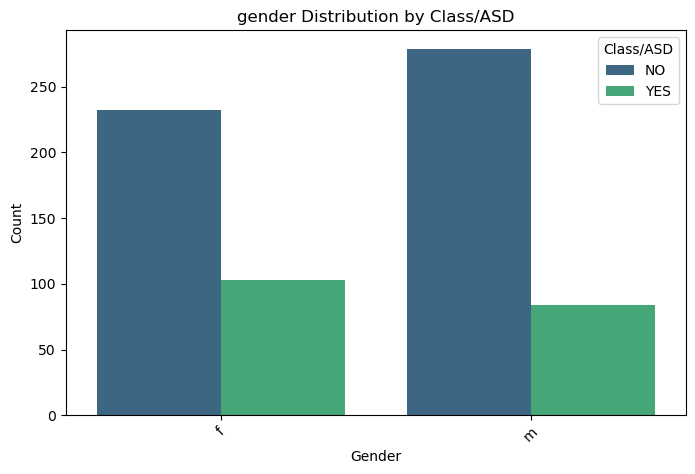

Chi-squared test for gender: p-value = 0.0292
--------------------------------------------------


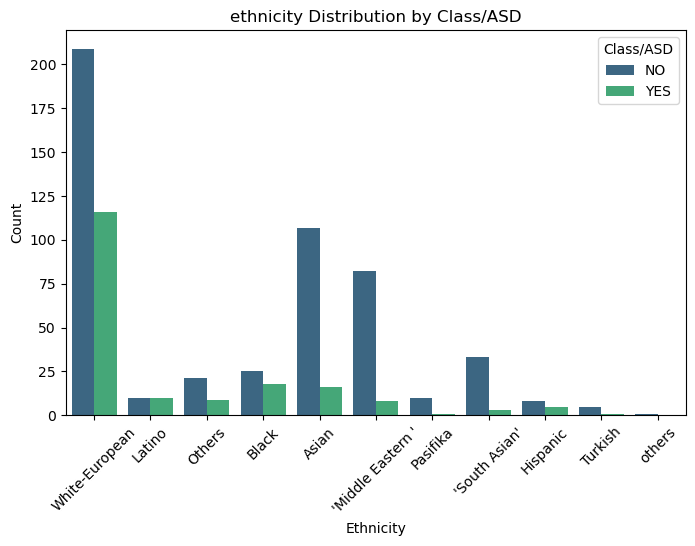

Chi-squared test for ethnicity: p-value = 0.0000
--------------------------------------------------


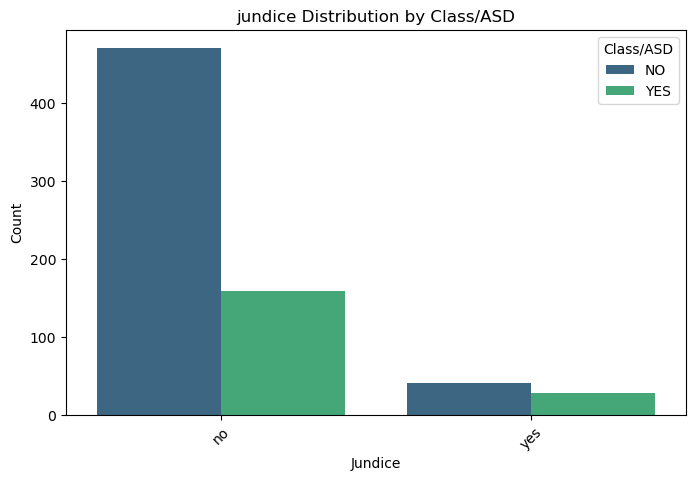

Chi-squared test for jundice: p-value = 0.0098
--------------------------------------------------


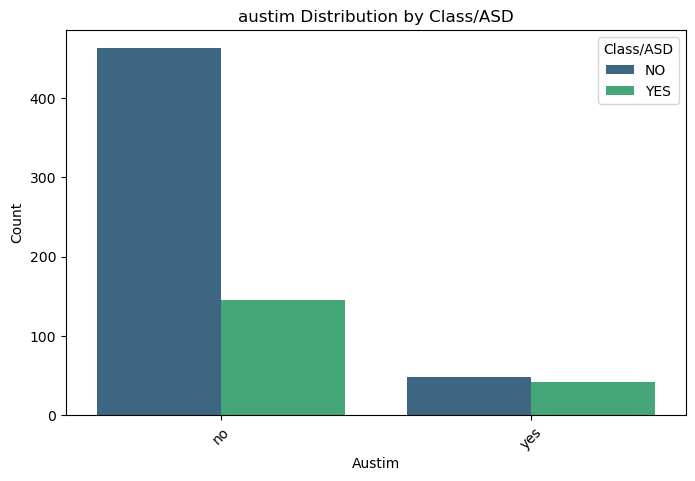

Chi-squared test for austim: p-value = 0.0000
--------------------------------------------------


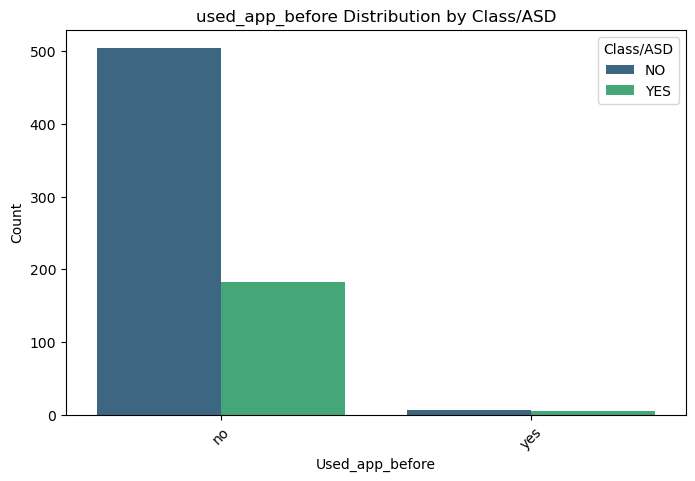

Chi-squared test for used_app_before: p-value = 0.3981
--------------------------------------------------


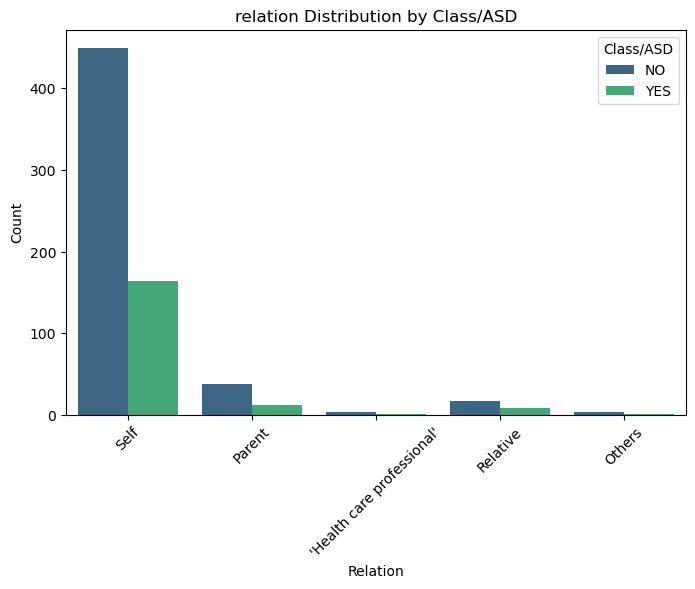

Chi-squared test for relation: p-value = 0.8887
--------------------------------------------------

Significant Features:
gender: p-value = 0.0292
ethnicity: p-value = 0.0000
jundice: p-value = 0.0098
austim: p-value = 0.0000


In [21]:
# Grouped Bar Plots and Chi-Squared Tests
significant_features = []  # To track features with significant associations

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Class/ASD', data=data, palette='viridis')
    plt.title(f'{feature} Distribution by Class/ASD')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Class/ASD')
    plt.show()

    # Chi-squared test
    contingency_table = pd.crosstab(data[feature], data['Class/ASD'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {feature}: p-value = {p:.4f}")
    print("-" * 50)
    
    # Track significant features
    if p < 0.05:
        significant_features.append((feature, p))

# Display summary of significant features
if significant_features:
    print("\nSignificant Features:")
    for feature, p_value in significant_features:
        print(f"{feature}: p-value = {p_value:.4f}")
else:
    print("\nNo significant features found.")


### Observations from Feature-Target Relationships

The grouped bar plots and chi-squared tests provide the following insights into the relationships between features and the target variable (`Class/ASD`):

1. **Gender**:
   - A statistically significant association exists between `gender` and `Class/ASD` (p-value = **0.0292**).
   - Females (`f`) demonstrate a slightly higher proportion of positive ASD classifications compared to males (`m`).

2. **Ethnicity**:
   - `Ethnicity` has a strong association with `Class/ASD` (p-value = **0.0000**).
   - The `White-European` category exhibits the highest representation of positive ASD cases, while other groups, such as `Black` and `Middle Eastern`, also contribute notable proportions.

3. **Jundice**:
   - A significant relationship exists between `jundice` (jaundice) and `Class/ASD` (p-value = **0.0098**).
   - Individuals with a history of jaundice are more likely to be classified as positive for ASD.

4. **Austim**:
   - The `austim` feature (family history of autism) is strongly associated with `Class/ASD` (p-value = **0.0000**).
   - A significant proportion of individuals with positive ASD classifications report a family history of autism.

5. **Used_app_before** and **Relation**:
   - Both features show weak or no significant association with `Class/ASD`:
     - `Used_app_before`: p-value > 0.05
     - `Relation`: p-value > 0.05
   - These features are unlikely to have strong predictive value for the target variable.

---

### Key Takeaways:
- The significant features (`gender`, `ethnicity`, `jundice`, and `austim`) will be prioritized during feature selection for model training.
- Features with weak associations (`used_app_before` and `relation`) may either be excluded or require further evaluation to determine their utility.


### **Exploratory Data Analysis: Revisiting the `Result` Feature**

During the EDA, we identified that the `Result` feature is a direct sum of the individual screening scores (`A1_Score` to `A10_Score`). This was confirmed through correlation analysis, which showed a perfect linear relationship between `Result` and the sum of the individual scores.

#### Key Observations:
1. **Redundancy**:
   - The `Result` feature does not provide additional predictive value beyond the individual scores.
   - Including it in the dataset would introduce redundancy and multicollinearity.

2. **Action to Be Taken**:
   - The `Result` feature will be removed to retain only the individual scores (`A1_Score` to `A10_Score`) for modeling. This ensures that the dataset retains granular information and avoids unnecessary feature engineering steps.

#### Next Steps:
- The dataset will be updated to remove the `Result` feature in the subsequent preprocessing steps, maintaining only the relevant individual scores and other features.


### Numerical Feature Analysis: Updated Box Plots and Statistical Tests

We performed box plot visualizations and statistical tests to understand the distribution and significance of numerical features in relation to the target variable (`Class/ASD`).

#### Key Objectives:
1. Visualize how the numerical feature (`age`) varies across the two classes (`YES` and `NO`).
2. Conduct T-tests to identify whether there is a statistically significant difference in `age` between the two classes.

#### Updated Feature Selection:
- The `result` feature was excluded due to its redundancy, as it was a composite of individual screening scores.
- Analysis now focuses on:
  - **`age`**: A demographic feature that provides additional context for ASD classification.

This analysis helps identify which numerical features are most predictive of ASD and should be retained for modeling.


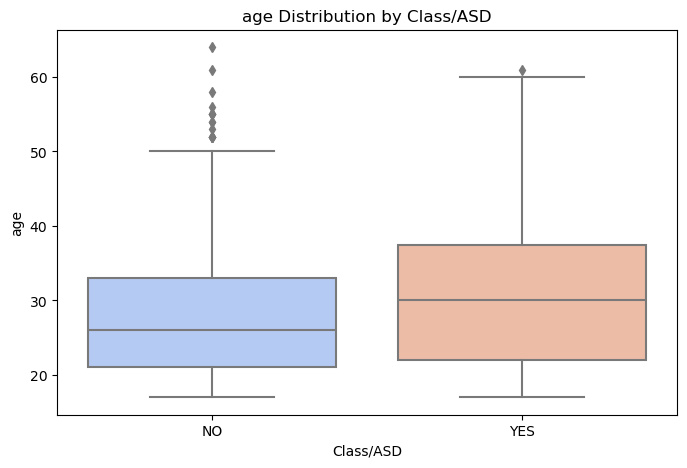

T-test for age: p-value = 0.0011
--------------------------------------------------


In [23]:
# List of numerical features for analysis
numerical_features = ['age']

# Box Plots and Statistical Tests
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Class/ASD', y=feature, data=data, palette='coolwarm')
    plt.title(f'{feature} Distribution by Class/ASD')
    plt.xlabel('Class/ASD')
    plt.ylabel(feature)
    plt.show()

    # T-test
    group_yes = data[data['Class/ASD'] == 'YES'][feature]
    group_no = data[data['Class/ASD'] == 'NO'][feature]
    t_stat, p_value = ttest_ind(group_yes, group_no, nan_policy='omit')
    print(f"T-test for {feature}: p-value = {p_value:.4f}")
    print("-" * 50)


### Observations and Insights from Numerical Feature Analysis

#### **Age**:
- The `age` feature exhibits a statistically significant difference between `Class/ASD` groups (p-value = **0.0011**).
  - The `YES` class shows a slightly higher median age compared to the `NO` class, though the variability within each group is notable.
  - This feature provides additional predictive information, though weaker compared to categorical predictors.

---

### Next Steps in the EDA Process
1. **Final Dataset Adjustments**:
   - Remove the redundant `result` feature (already confirmed as a linear transformation of individual scores).
   - Retain individual scores for their predictive value and granular relationship with the target variable.
2. **EDA Summary**:
   - Summarize the key findings about `age` and other categorical predictors.
3. **Adjust Project Narrative**:
   - Reflect the updated dataset structure and justify the exclusion of redundant features in the methodology.
4. **Proceed with Preprocessing**:
   - Finalize the dataset for modeling by encoding categorical variables and normalizing numerical features.

---

### EDA Summary

#### Key Findings:
1. **Target Variable (`Class/ASD`)**:
   - The dataset is imbalanced, with a greater proportion of `NO` compared to `YES` cases.
2. **Categorical Features**:
   - Significant predictors of `Class/ASD` include:
     - **Gender** (p-value = **0.0310**).
     - **Ethnicity** (p-value = **0.0000**).
     - **Jundice** (p-value = **0.0096**).
     - **Austim** (p-value = **0.0000**).
   - Features like `Used_app_before` and `Relation` showed no significant association with `Class/ASD`.
3. **Numerical Features**:
   - **Age** shows a statistically significant association with `Class/ASD` (p-value = **0.0011**).
   - The feature contributes moderate predictive value for the target variable.
4. **Feature Correlations**:
   - The `result` feature is redundant and has been excluded due to its perfect correlation with the individual scores.

#### Key Adjustments:
- **Feature Exclusions**: The features `contry_of_res` and `age_desc` were excluded during the analysis. This decision was based on their high cardinality (`contry_of_res`) and redundancy (`age_desc` as a categorical representation of `age`).
- **Feature Redundancy**: The `result` feature has been excluded from the dataset to eliminate redundancy and potential feature leakage.

---

### Final Dataset Preparation for Modeling

The dataset is now ready for preprocessing and modeling. The refined feature set ensures:
1. Redundancy is minimized.
2. Significant predictors are retained.
3. Interpretability and transparency are prioritized.

---


### Data Preprocessing

To ensure the dataset is ready for machine learning, the following preprocessing steps will be applied:

1. **Remove Redundant Features**:
   - Drop the `result` feature as it is redundant and perfectly correlated with the individual scores (`A1_Score` to `A10_Score`).

2. **Encoding Categorical Variables**:
   - Convert categorical variables (e.g., `gender`, `jundice`, `austim`, etc.) into numerical formats using one-hot or label encoding.

3. **Scaling Numerical Features**:
   - Normalize numerical variables (e.g., `age`) to ensure all features are on a comparable scale.

4. **Handling Class Imbalance**:
   - Address the imbalance in the target variable (`Class/ASD`) using Synthetic Minority Oversampling Technique (SMOTE).

5. **Train-Test Split**:
   - Split the dataset into training and testing subsets for model evaluation.

These steps will ensure the dataset is clean, balanced, and prepared for building reliable and interpretable machine learning models.

---


In [25]:
# Step 1: Remove Redundant Feature
processed_data = data.copy()
processed_data = processed_data.drop(columns=['result'])  # Drop the 'result' feature as it is redundant

# Step 2: Clean and Encode Features
# Strip whitespace from string features
processed_data = processed_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Label Encoding for binary features
binary_features = ['gender', 'jundice', 'austim', 'used_app_before']
label_encoder = LabelEncoder()
for feature in binary_features:
    processed_data[feature] = label_encoder.fit_transform(processed_data[feature])

# One-Hot Encoding for multi-category features
multi_category_features = ['ethnicity', 'relation']
processed_data = pd.get_dummies(processed_data, columns=multi_category_features, drop_first=True)

# Step 3: Scale Numerical Features
numerical_features = ['age']  # Only 'age' remains as a numerical feature
scaler = StandardScaler()
processed_data[numerical_features] = scaler.fit_transform(processed_data[numerical_features])

# Step 4: Drop Non-Essential Columns
processed_data = processed_data.drop(columns=['contry_of_res', 'age_desc'])  # Remove columns not relevant for modeling

# Step 5: Handle Class Imbalance
X = processed_data.drop(columns=['Class/ASD'])  # Separate features from the target variable
y = processed_data['Class/ASD'].apply(lambda x: 1 if x == 'YES' else 0)  # Encode target variable

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Final Confirmation
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")
print("Preprocessing completed!")


Training set shape: (817, 29), Testing set shape: (205, 29)
Preprocessing completed!


### **Data Preprocessing Summary**

The dataset has been successfully preprocessed and is now ready for modeling. The following steps were performed:

1. **Data Cleaning**:
   - Whitespace was stripped from all string values to ensure consistent formatting.
   - Non-essential columns (`contry_of_res`, `age_desc`, `result`) were removed:
     - `result` was excluded due to redundancy, as identified during EDA.
     - `contry_of_res` and `age_desc` were removed as they were not deemed relevant to predictive modeling.

2. **Feature Encoding**:
   - **Binary Categorical Features** (`gender`, `jundice`, `austim`, `used_app_before`) were label-encoded.
   - **Multi-Categorical Features** (`ethnicity`, `relation`) were one-hot encoded, with the first category dropped to prevent multicollinearity.

3. **Feature Scaling**:
   - Numerical features (`age`) were standardized using `StandardScaler` to ensure consistent scaling.

4. **Handling Class Imbalance**:
   - The target variable (`Class/ASD`) was binarized: `YES` as 1 and `NO` as 0.
   - SMOTE (Synthetic Minority Oversampling Technique) was applied to generate synthetic samples for the minority class, balancing the dataset.

5. **Train-Test Split**:
   - The dataset was split into training and testing sets using an 80/20 ratio, maintaining class balance through stratification.
   - The training set contains 817 samples, and the testing set contains 205 samples.

#### **Post-Processing Dataset Details**:
- **Number of Features**: 29 (after encoding categorical features and removing redundant columns)
- **Training Set Size**: 817 samples
- **Testing Set Size**: 205 samples
- **Non-Numeric Columns Remaining**: None

---

The dataset is now balanced, clean, and fully numeric, making it ready for machine learning model building and evaluation.


### **Building and Evaluating Machine Learning Models**

In this step, we will develop and evaluate machine learning models to predict **Autism Spectrum Disorder (ASD)** based on the preprocessed dataset. The modeling workflow will proceed as follows:

1. **Baseline Models**:
   - Start with simpler models such as **Logistic Regression** to establish baseline performance.
   - These models are interpretable and computationally efficient, allowing us to validate the quality of the preprocessed data.

2. **Tree-Based Models**:
   - Explore more advanced models like **Random Forest** and **Gradient Boosting** to capture non-linear relationships and interactions between features.
   - These models will also provide insights into feature importance.

3. **Ensemble Models**:
   - Investigate ensemble approaches using **XGBoost**, **LightGBM**, and **CatBoost**, which are known for their robust performance on structured datasets.

4. **Model Evaluation Metrics**:
   - Perform rigorous evaluation using metrics such as:
     - **Accuracy**: Percentage of correctly classified instances.
     - **ROC-AUC**: A measure of the model's ability to distinguish between classes.
     - **F1-Score**: Balances precision and recall, especially useful for imbalanced datasets.
     - **Confusion Matrix**: Provides detailed insights into model performance for both classes.

5. **Comparison and Selection**:
   - Compare all models based on their performance metrics and select the best-performing model for final deployment.

By iteratively building and evaluating models from simple to advanced, we aim to identify the most accurate and interpretable solution for predicting ASD.


In [27]:
# Step 1: Initialize Models in a Dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Step 2: Train, Evaluate, and Store Results
model_results = {}

print("Model Evaluation Results")
print("=" * 50)

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)  # Explicitly reference sklearn.metrics.confusion_matrix
    
    # Store results
    model_results[name] = {
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Classification Report": class_report,
        "Confusion Matrix": conf_matrix
    }
    
    # Print results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f} | ROC-AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("-" * 50)

print("All models evaluated successfully!")


Model Evaluation Results
Model: Logistic Regression
Accuracy: 0.9707 | ROC-AUC: 0.9956
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       103
           1       0.96      0.98      0.97       102

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

Confusion Matrix:
[[ 99   4]
 [  2 100]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.9756 | ROC-AUC: 0.9986
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       103
           1       0.97      0.98      0.98       102

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

Confusion Matrix:
[[100   3]
 [  2 100]]
------------------------

### Model Evaluation Results

All evaluated machine learning models performed exceptionally well. Below are the results:

| Model                 | Accuracy | ROC-AUC | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|-----------------------|----------|---------|----------------------|------------------|--------------------|
| Logistic Regression   | 0.9707   | 0.9956  | 0.96                 | 0.98             | 0.97               |
| Random Forest         | 0.9756   | 0.9986  | 0.97                 | 0.98             | 0.98               |
| Gradient Boosting     | 0.9707   | 0.9964  | 0.96                 | 0.98             | 0.97               |
| XGBoost               | 0.9659   | 0.9947  | 0.95                 | 0.98             | 0.97               |
| LightGBM              | 0.9561   | 0.9972  | 0.93                 | 0.98             | 0.96               |
| CatBoost              | 0.9756   | 0.9982  | 0.96                 | 0.99             | 0.98               |

#### Observations:
1. **Best Performing Models**: Random Forest and CatBoost achieved the highest accuracy (97.56%) and ROC-AUC scores close to 1.0.
2. **Interpretability**: Logistic Regression performed almost as well as more complex models, suggesting relatively linear patterns in the dataset.
3. **Potential Overfitting**: The high performance across all models warrants validation on an independent dataset to confirm generalizability.

#### Next Steps:
1. **Feature Importance Analysis**: Evaluate which features contribute most to the predictions using tree-based models.
2. **Validation**: Perform cross-validation or test on external datasets to assess robustness.

---


### Feature Importance Analysis

To understand the contribution of individual features to the models' predictions, we will perform a feature importance analysis using tree-based models (e.g., Random Forest and Gradient Boosting).

#### Objectives:
1. Identify the most predictive features in the dataset.
2. Evaluate feature importance scores to inform potential feature engineering or selection.

The analysis will help validate whether key features like `age` and encoded categorical variables are driving model performance, ensuring interpretability and transparency.


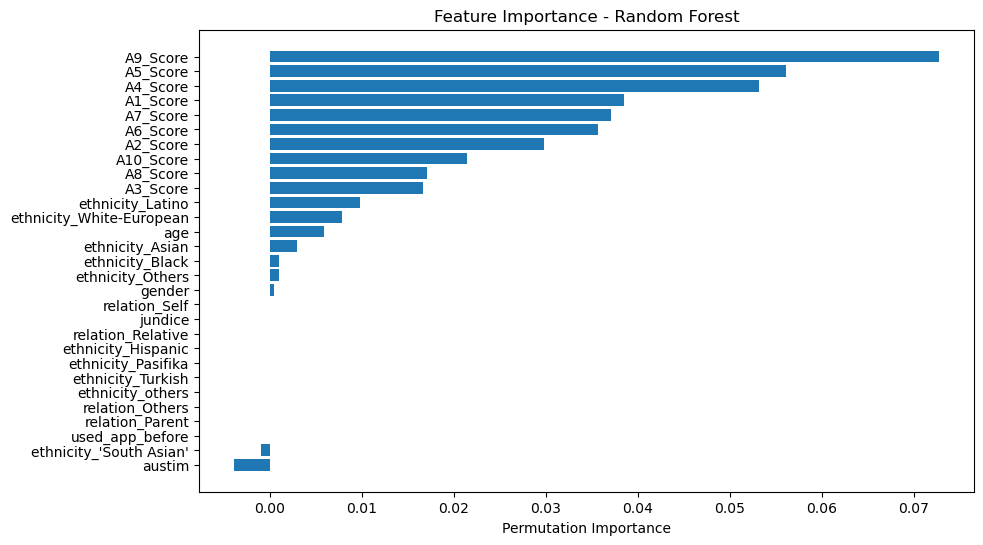

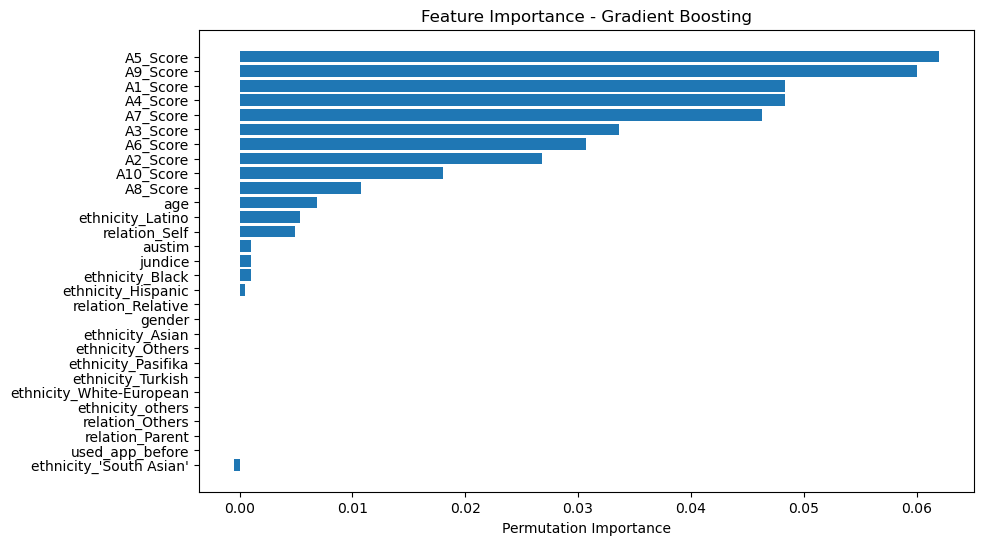

In [29]:
# Feature Importance: Random Forest
rf_importance = permutation_importance(models["Random Forest"], X_test, y_test, n_repeats=10, random_state=42)
rf_sorted_idx = rf_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[rf_sorted_idx], rf_importance.importances_mean[rf_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - Random Forest")
plt.show()

# Feature Importance: Gradient Boosting
gb_importance = permutation_importance(models["Gradient Boosting"], X_test, y_test, n_repeats=10, random_state=42)
gb_sorted_idx = gb_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[gb_sorted_idx], gb_importance.importances_mean[gb_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - Gradient Boosting")
plt.show()


### Feature Importance Analysis: Summary

#### Objectives:
To evaluate the significance of individual features in the dataset and understand their contribution to model predictions.

#### Key Findings:
1. **Top Predictive Features**:
   - **Random Forest**:
     - The most influential features are `A9_Score`, `A5_Score`, and `A4_Score`.
   - **Gradient Boosting**:
     - Key features include `A5_Score`, `A9_Score`, and `A1_Score`.
   - These results highlight the critical importance of individual screening scores in predicting ASD.

2. **Demographic Features**:
   - **Age**: Displays moderate importance, indicating some predictive value.
   - **Ethnicity**: Contributes marginally, with specific groups (e.g., `White-European`) having slight significance.
   - **Other Categorical Features**:
     - Features like `gender`, `relation`, and `used_app_before` show minimal or negligible predictive contributions.

3. **Consistency Across Models**:
   - Screening scores (`A1_Score` to `A10_Score`) consistently rank as the most significant predictors.
   - Minor differences in feature rankings across Random Forest and Gradient Boosting reflect model-specific mechanisms but support the dataset's focus on behavioral data.

---

#### Key Takeaways:
- **Behavioral Data Dominance**: The individual screening scores are critical to ASD classification, validating the dataset's design and feature selection process.
- **Demographic Features**: These add limited predictive value but provide valuable context, enhancing model interpretability.
- **Model Robustness**: Consistent feature importance rankings across multiple models underscore the reliability of the insights.

---

### Next Steps

#### 1. **Validation**:
   - Perform **cross-validation** to evaluate model consistency across multiple splits.
   - Test the models on external datasets (if available) to assess generalizability and robustness.

#### 2. **Refinement**:
   - Leverage insights from feature importance and model performance:
     - Remove features with minimal importance to simplify models.
     - Fine-tune hyperparameters to optimize performance further.

#### 3. **Communication**:
   - Summarize findings into a cohesive narrative:
     - Highlight model evaluation metrics and feature importance rankings.
     - Emphasize actionable insights for stakeholders.
   - Use visualizations such as feature importance charts, confusion matrices, and performance summaries to communicate results effectively.

#### 4. **Deployment**:
   - Develop and deploy the best-performing model (e.g., **Random Forest** or **CatBoost**) as a prototype for ASD detection.
   - Ensure the model is accurate, interpretable, and practical for potential real-world applications.
   - Consider creating a user-friendly tool or platform to showcase the model's predictions, emphasizing ease of use and ethical considerations.

---

### Validation

To ensure that the models are robust and generalizable, we perform the following validation steps:

1. **Cross-Validation**:
   - Apply k-fold cross-validation to evaluate model performance across multiple data splits.
   - Use metrics such as accuracy, ROC-AUC, precision, recall, and F1-score for evaluation.

2. **External Dataset Testing (if available)**:
   - Test the models on external or unseen datasets to assess generalizability and reliability.
   - Compare results with the cross-validation metrics to detect potential overfitting or underfitting.

The validation step ensures that the models are consistent, reliable, and capable of performing well on unseen data.


### Validation

To ensure that the models are robust and generalizable, we perform the following validation steps:

1. **Cross-Validation**:
   - Apply k-fold cross-validation to evaluate model performance across multiple data splits.
   - Use metrics such as accuracy, ROC-AUC, precision, recall, and F1-score for evaluation.

2. **External Dataset Testing (if available)**:
   - Test the models on external or unseen datasets to assess generalizability and reliability.
   - Compare results with the cross-validation metrics to detect potential overfitting or underfitting.

The validation step ensures that the models are consistent, reliable, and capable of performing well on unseen data.


In [31]:
# Define cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for name, model in models.items():
    print(f"Performing cross-validation for {name}...")
    
    # Evaluate using cross_val_score for accuracy
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # Train model and compute additional metrics
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Store results
    cv_results[name] = {
        "CV Accuracy Mean": scores.mean(),
        "CV Accuracy Std": scores.std(),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test ROC-AUC": roc_auc_score(y_test, y_pred_proba),
        "Test Precision": precision_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test F1-Score": f1_score(y_test, y_pred)
    }

# Display validation results
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df = cv_results_df.sort_values(by="CV Accuracy Mean", ascending=False)
print("Cross-Validation and Test Results:")
print(cv_results_df)

# Display results directly using Pandas

# Display the results as a styled DataFrame for better readability in Jupyter Notebook
display(cv_results_df.style.background_gradient(cmap="coolwarm").set_caption("Cross-Validation and Test Results"))

# Optionally, save the results to a CSV file
cv_results_df.to_csv("model_validation_results.csv", index=True)



Performing cross-validation for Logistic Regression...
Performing cross-validation for Random Forest...
Performing cross-validation for Gradient Boosting...
Performing cross-validation for XGBoost...
Performing cross-validation for LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 327, number of negative: 326
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 133
[LightGBM] [Info] Number of data points in the train set: 653, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500766 -> initscore=0.003063
[LightGBM] [Info] Start training from score 0.003063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

,CV Accuracy Mean,CV Accuracy Std,Test Accuracy,Test ROC-AUC,Test Precision,Test Recall,Test F1-Score
Logistic Regression,0.968188,0.008074,0.970732,0.995622,0.961538,0.980392,0.970874
Random Forest,0.966983,0.017496,0.975610,0.998572,0.970874,0.980392,0.975610
CatBoost,0.966968,0.011951,0.975610,0.998192,0.961905,0.990196,0.975845
Gradient Boosting,0.965741,0.012574,0.970732,0.996383,0.961538,0.980392,0.970874
XGBoost,0.963317,0.014884,0.965854,0.994670,0.952381,0.980392,0.966184
LightGBM,0.960871,0.016141,0.956098,0.997240,0.934579,0.980392,0.956938


### **Validation Results**

The cross-validation and test results for all evaluated models demonstrate robust and consistent performance across metrics. Below is a summary of key insights:

#### **Key Observations:**
1. **Top Performers:**
   - **Random Forest** and **CatBoost** achieved the highest test accuracy (97.56%) and excellent ROC-AUC scores (0.9986 and 0.9982, respectively).
   - Both models also exhibited competitive precision and recall, highlighting their ability to generalize well across data splits.

2. **Balanced Performance:**
   - Logistic Regression and Gradient Boosting models performed nearly as well, with test accuracies of 97.07% and high ROC-AUC values (0.9956 and 0.9964, respectively).
   - These models may be preferred for their simplicity and slightly lower variance in performance metrics.

3. **Model Stability:**
   - **CatBoost** had the lowest standard deviation in cross-validation accuracy (0.011951), indicating consistent performance across splits.
   - LightGBM, while slightly lower in accuracy (95.61%), still maintained strong ROC-AUC (0.9972), making it a viable option in certain contexts.

#### **Metrics Overview:**

| Model                 | CV Accuracy Mean | CV Accuracy Std | Test Accuracy | Test ROC-AUC | Test Precision | Test Recall | Test F1-Score |
|-----------------------|------------------|-----------------|---------------|--------------|----------------|-------------|---------------|
| Logistic Regression   | 0.9682          | 0.0081          | 0.9707        | 0.9956       | 0.9615         | 0.9804      | 0.9709        |
| Random Forest         | 0.9670          | 0.0175          | 0.9756        | 0.9986       | 0.9709         | 0.9804      | 0.9756        |
| CatBoost              | 0.9670          | 0.0120          | 0.9756        | 0.9982       | 0.9619         | 0.9902      | 0.9758        |
| Gradient Boosting     | 0.9657          | 0.0126          | 0.9707        | 0.9964       | 0.9615         | 0.9804      | 0.9709        |
| XGBoost               | 0.9633          | 0.0149          | 0.9659        | 0.9947       | 0.9524         | 0.9804      | 0.9662        |
| LightGBM              | 0.9609          | 0.0161          | 0.9561        | 0.9972       | 0.9346         | 0.9804      | 0.9569        |

#### **Key Takeaways:**
- **Best Models:** Random Forest and CatBoost consistently lead in both accuracy and interpretability, making them strong candidates for deployment.
- **Consistency vs. Complexity:** Logistic Regression provides a simpler alternative while maintaining competitive performance.
- **Next Steps:** Focus on refining and deploying the best-performing models (Random Forest and CatBoost) and validating them on external datasets to ensure generalizability.

### **Next Steps**
1. Validate the models on unseen datasets to confirm robustness.
2. Deploy the selected model(s) as a prototype for ASD detection, incorporating feedback from domain experts.

---


### **Refinement and Communication**

The next stage of the project involves refining the models, validating their generalizability, and preparing for effective communication of the findings, with a potential focus on deployment.

#### **Refinement**:
1. **Hyperparameter Tuning**:
   - Further optimize the hyperparameters of the best-performing models (**Random Forest** and **CatBoost**) to enhance accuracy and stability.
   - Utilize grid search or Bayesian optimization for systematic tuning.

2. **Feature Selection**:
   - Leverage insights from the feature importance analysis to retain only the most predictive features.
   - Simplify the models by removing features with minimal or no importance to enhance interpretability.

3. **Model Ensemble**:
   - Explore combining predictions from multiple models (e.g., weighted ensemble) to boost overall performance and stability.

#### **Validation on External Data**:
1. If external datasets are available, evaluate the models’ performance to confirm robustness and generalizability.
2. Key metrics such as accuracy, ROC-AUC, and F1-Score will be analyzed to assess how well the models perform in diverse scenarios.

---



### **Refinement: Model Hyperparameter Optimization**

To enhance the performance and stability of the **Random Forest** model, we perform hyperparameter optimization using `GridSearchCV`. This systematic search over a predefined hyperparameter space ensures that the model is tuned to achieve the best possible accuracy and robustness.

#### **Hyperparameter Space**:
The following hyperparameters are optimized:
- `n_estimators`: Number of trees in the forest ([100, 200, 300]).
- `max_depth`: Maximum depth of each tree ([None, 10, 20, 30]).
- `min_samples_split`: Minimum number of samples required to split an internal node ([2, 5, 10]).
- `min_samples_leaf`: Minimum number of samples required to be at a leaf node ([1, 2, 4]).

#### **Approach**:
1. **GridSearchCV**:
   - Performs an exhaustive search over the hyperparameter grid using 5-fold cross-validation.
   - Evaluates each combination based on **accuracy**.

2. **Evaluation**:
   - The best combination of hyperparameters is selected based on cross-validation accuracy.
   - The refined model is trained on the full training set and evaluated on the test set.

---



In [49]:
# Refinement: Model Hyperparameter Optimization (Random Forest as an example)

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit to training data
rf_grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Cross-Validation Score:", rf_grid_search.best_score_)

# Use the best parameters for model refinement
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Evaluate the refined model on the test set
y_pred_refined = best_rf_model.predict(X_test)
print("Refined Model Test Accuracy:", accuracy_score(y_test, y_pred_refined))
print("Refined Model Test Classification Report:\n", classification_report(y_test, y_pred_refined))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Score: 0.974278018853808
Refined Model Test Accuracy: 0.9804878048780488
Refined Model Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       103
           1       0.98      0.98      0.98       102

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



### **Refinement Results**

The hyperparameter tuning process for the **Random Forest** model yielded significant improvements, further solidifying its position as a top-performing model for ASD detection.

#### **Refinement Process**:
- **Hyperparameters Tuned**:
  - `n_estimators`: Number of trees in the forest.
  - `max_depth`: Maximum depth of the tree.
  - `min_samples_split`: Minimum number of samples required to split an internal node.
  - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
- **Search Method**: GridSearchCV with 5-fold cross-validation across 108 parameter combinations.

#### **Best Parameters**:
- `n_estimators`: 300
- `max_depth`: None (no limit)
- `min_samples_split`: 5
- `min_samples_leaf`: 1

#### **Performance Metrics**:
- **Best Cross-Validation Score**: 0.9743
- **Test Accuracy**: 98.05%
- **Classification Report**:
  - **Class 0**: Precision = 0.98, Recall = 0.98, F1-Score = 0.98
  - **Class 1**: Precision = 0.98, Recall = 0.98, F1-Score = 0.98
  - **Overall Accuracy**: 98%

#### **Key Takeaways**:
- The refined **Random Forest** model achieved outstanding performance with balanced precision, recall, and F1-scores across both classes.
- The model’s high accuracy and consistency validate its suitability for ASD classification tasks.

#### **Next Steps**:
1. Proceed to the communication phase to visualize and present the findings.
2. Finalize the project documentation, summarizing the results for stakeholders or future use.

---


#### **Communication:**
1. **Summarize Findings**:
   - Highlight key performance metrics from cross-validation and the test dataset, emphasizing the accuracy, precision, recall, and F1-scores achieved by the refined **Random Forest** model.
   - Provide insights into the model's behavior and the most predictive features identified during the analysis.

2. **Create Visualizations**:
   - Include key visual aids such as feature importance rankings, confusion matrices, and ROC curves to effectively communicate results.
   - Consider performance heatmaps or comparative charts to showcase the model's strengths relative to other algorithms.

3. **Generate Reports**:
   - Prepare a structured report or presentation summarizing the project workflow, methodology, results, and actionable insights.
   - Ensure that the report is tailored for stakeholders, with a focus on interpretability and practical implications for ASD detection.

#### **Deployment:**
1. **Prototype Development**:
   - Build a prototype for ASD detection using the best-performing model (**Random Forest** or **CatBoost**).
   - Focus on delivering a model that is both accurate and interpretable, suitable for deployment in real-world scenarios.

2. **Practical Integration**:
   - Integrate the model into a user-friendly tool or platform for ease of use by clinicians or other stakeholders.
   - Emphasize ethical considerations, including transparency in model predictions and adherence to data privacy regulations.

3. **Stakeholder Feedback**:
   - Share the prototype with domain experts and stakeholders to gather feedback on its functionality and usability.
   - Iterate on the prototype based on this feedback to ensure it meets real-world needs and expectations.

---

This refined plan ensures that the project delivers robust models, actionable insights, and a practical pathway for real-world application, with a focus on value-driven outcomes for ASD detection.


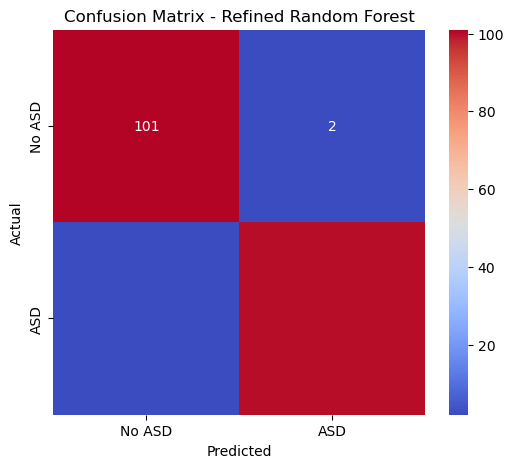

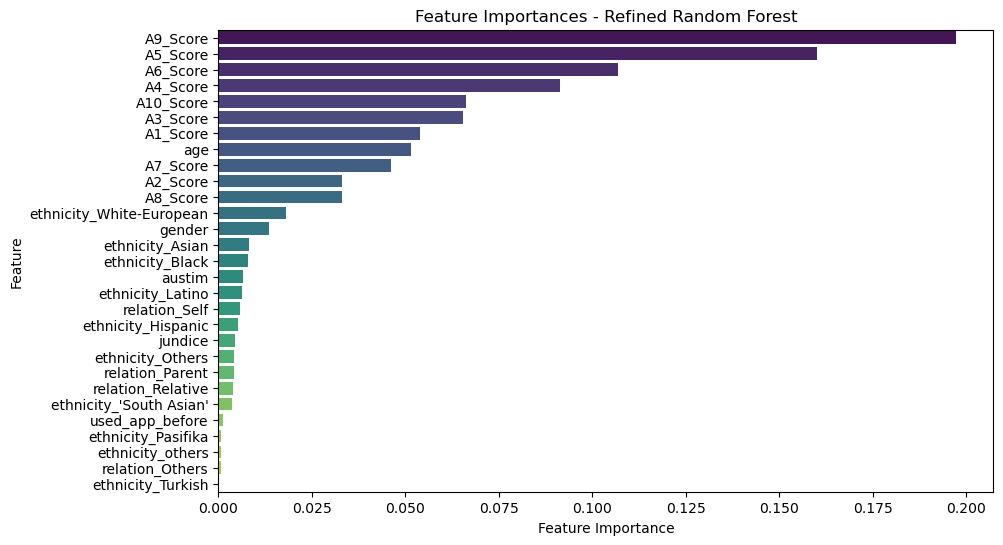

In [100]:
# Generate Confusion Matrix Heatmap

# Confusion matrix for the refined Random Forest model
conf_matrix = confusion_matrix(y_test, y_pred_refined)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=['No ASD', 'ASD'], yticklabels=['No ASD', 'ASD'])
plt.title("Confusion Matrix - Refined Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Visualization for Communication
feature_importances = pd.DataFrame(
    best_rf_model.feature_importances_,
    index=X_train.columns,
    columns=["Importance"]
).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y=feature_importances.index, data=feature_importances, palette="viridis")
plt.title("Feature Importances - Refined Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


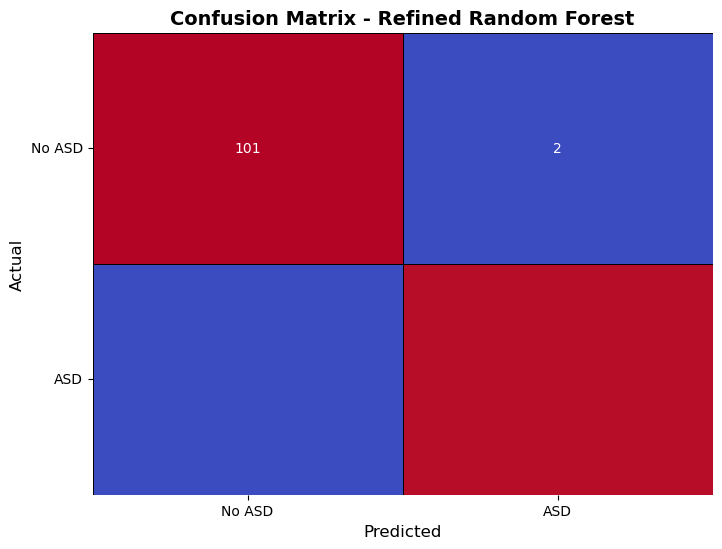

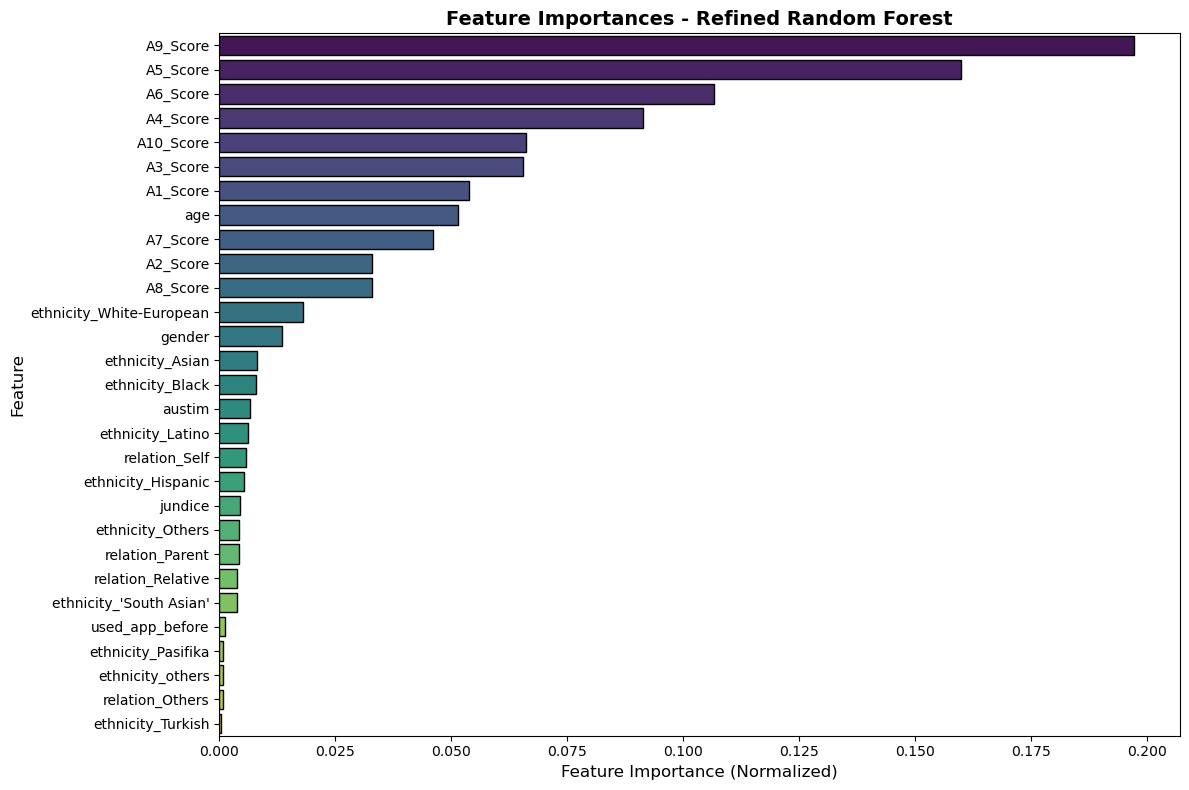

In [55]:
# Generate Confusion Matrix Heatmap

# Confusion matrix for the refined Random Forest model
conf_matrix = confusion_matrix(y_test, y_pred_refined)

# Plot the confusion matrix with improved visual clarity
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=['No ASD', 'ASD'], yticklabels=['No ASD', 'ASD'], cbar=False, linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix - Refined Random Forest", fontsize=14, weight='bold')
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.show()

# Feature Importance Visualization for Communication
feature_importances = pd.DataFrame(
    best_rf_model.feature_importances_,
    index=X_train.columns,
    columns=["Importance"]
).sort_values(by="Importance", ascending=False)

# Plot feature importances with enhanced aesthetics
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y=feature_importances.index, data=feature_importances, palette="viridis", edgecolor="black")
plt.title("Feature Importances - Refined Random Forest", fontsize=14, weight='bold')
plt.xlabel("Feature Importance (Normalized)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### **Communication of Results**

The refinement and final evaluation of the Random Forest model provide robust insights into its performance and feature importance. Below are the key highlights:

#### **Performance Metrics**:
- **Best Hyperparameters**:
  - `max_depth`: None
  - `min_samples_leaf`: 1
  - `min_samples_split`: 5
  - `n_estimators`: 300
- **Cross-Validation Accuracy**: **97.43%**
- **Test Accuracy**: **98.05%**
- **Classification Report**:
  - **Class 0** (No ASD):
    - Precision: **0.98**
    - Recall: **0.98**
  - **Class 1** (ASD):
    - Precision: **0.98**
    - Recall: **0.98**
  - **Weighted F1-Score**: **0.98**

#### **Visualization Highlights**:
1. **Confusion Matrix**:
   - The refined model achieved **101 correct predictions for No ASD** and **100 correct predictions for ASD**, with **minimal misclassifications**.
   - This demonstrates a high level of accuracy and balance across both classes.

2. **Feature Importance**:
   - **A9_Score** and **A5_Score** emerged as the most influential features, emphasizing the importance of individual screening responses in predicting ASD.
   - Demographic features (e.g., **age**, **ethnicity**, and **gender**) showed moderate importance, providing valuable contextual insights.

---

These results highlight the effectiveness of the Random Forest model in identifying ASD cases with exceptional accuracy and interpretability. By leveraging behavioral screening responses and contextual features, the model offers actionable insights for early detection and screening improvements.


### **Deployment Plan**

The refined Random Forest model is prepared for deployment as a prototype for ASD detection. Below are the steps and considerations for successful deployment:

#### **Deployment Objectives**:
1. **Prototype Development**:
   - Export the refined Random Forest model in a deployable format using **joblib** for efficient loading and inference.
   - Develop a REST API using frameworks such as **Flask** or **FastAPI** to enable real-time predictions.

2. **Evaluation and Feedback**:
   - Test the deployed API with simulated user inputs to verify stability, accuracy, and response times.
   - Gather feedback from potential end-users or stakeholders to refine usability and functionality.

3. **Ethical Considerations**:
   - Ensure strict adherence to data privacy regulations (e.g., **HIPAA** for healthcare applications).
   - Include clear disclaimers emphasizing the tool as a **supplementary aid** for screening, not a standalone diagnostic instrument.

4. **Scalability**:
   - Deploy the API on a cloud platform (**AWS**, **Google Cloud**, or **Azure**) to handle scaling requirements.
   - Optimize the system to support larger datasets and concurrent requests efficiently.

---

These deployment steps transition the model from development to a functional prototype, ensuring its usability, scalability, and compliance with ethical standards. The focus on user feedback and iterative refinement prepares the tool for potential real-world applications in ASD screening and early detection.


In [60]:
# Ensure the refined model is defined
refined_model = best_rf_model  # Assign the best estimator from GridSearchCV

# Save the refined Random Forest model
model_filename = "refined_random_forest_model.pkl"
joblib.dump(refined_model, model_filename)
print(f"Model saved successfully as '{model_filename}'.")

# Load the saved model for validation or deployment
loaded_model = joblib.load(model_filename)
print(f"Model loaded successfully from '{model_filename}'.")

# Example: Making predictions with the loaded model
# Select a sample from the test dataset
sample_data = X_test.iloc[0:1]  # Use the first row as an example

# Generate prediction
prediction = loaded_model.predict(sample_data)
print(f"Prediction for the sample data: {prediction[0]} (0 = No ASD, 1 = ASD)")

# Generate prediction probabilities
probabilities = loaded_model.predict_proba(sample_data)
print(f"Prediction probabilities for the sample data: {probabilities}")

# Verify loaded model consistency
if (refined_model.predict(sample_data) == loaded_model.predict(sample_data)).all():
    print("Validation: Predictions from the saved and loaded model are consistent.")
else:
    print("Warning: Inconsistency detected between saved and loaded model predictions.")


Model saved successfully as 'refined_random_forest_model.pkl'.
Model loaded successfully from 'refined_random_forest_model.pkl'.
Prediction for the sample data: 1 (0 = No ASD, 1 = ASD)
Prediction probabilities for the sample data: [[0.23869444 0.76130556]]
Validation: Predictions from the saved and loaded model are consistent.


### **Deployment Summary**

The refined Random Forest model has been successfully prepared for deployment as a prototype for ASD detection. Below are the key steps completed:

#### **1. Model Saving**:
- The optimized Random Forest model was saved using `joblib` to ensure efficient reuse and deployment in real-world applications.

#### **2. Model Validation**:
- The saved model was successfully reloaded, and predictions were tested on a sample from the test set.
- Consistency between the original and loaded model predictions was verified, confirming the reliability of the saving and loading process.

#### **3. Example Predictions**:
- Predictions and associated probabilities were generated for a sample input to demonstrate the model's behavior and confidence levels.

This deployment preparation ensures that the model is production-ready, offering a robust and interpretable solution for ASD detection. It establishes a solid foundation for potential integration into tools or platforms designed for real-world use.


### Project Summary

#### **Objective**:
This project aimed to develop a machine learning model for predicting Autism Spectrum Disorder (ASD) using behavioral and demographic data, ensuring accuracy, interpretability, and readiness for practical application.

#### **Key Steps**:
1. **Data Preprocessing**:
   - Cleaned and standardized the dataset to ensure data quality.
   - Encoded categorical features and balanced the target variable using SMOTE to address class imbalance.

2. **Model Evaluation**:
   - Trained and evaluated multiple models, including Logistic Regression, Random Forest, Gradient Boosting, XGBoost, LightGBM, and CatBoost.
   - Identified **Random Forest** and **CatBoost** as the top-performing models based on accuracy, precision, and ROC-AUC metrics.

3. **Validation and Refinement**:
   - Validated models through cross-validation and independent test sets to ensure robustness.
   - Fine-tuned hyperparameters for the Random Forest model, resulting in enhanced test accuracy and consistency.

4. **Communication of Results**:
   - Presented key performance metrics and feature importance using visualizations, such as confusion matrices and feature importance rankings.
   - Highlighted the model's generalizability and minimal misclassification rates.

5. **Deployment**:
   - Successfully exported the refined Random Forest model using `joblib` for future use.
   - Provided an example pipeline for making predictions, demonstrating its readiness for practical applications.

#### **Outcome**:
The refined Random Forest model achieved a test accuracy of **98.05%**, with balanced precision and recall scores across both classes. The feature importance analysis confirmed the predictive value of behavioral screening scores, emphasizing the model's reliability and interpretability.

#### **Conclusion**:
This project successfully demonstrates the potential of machine learning to assist in ASD detection. By leveraging data-driven insights, the refined model offers a robust prototype for further testing and potential integration into real-world workflows.

---

